
<img src="NumPie.svg" width="400" align="right">

## Objectives

- Understand the concept of unsupervised learning
- Learn the _k-means clustering_ algorithm  through implementation
- Practice numerical array computations without `for` or `while` loops


## Background

The preliminary dataset contains the geographical (2D) locations of habitual pizza eaters. Based on this information you will identify the clusters of potential customers and their location centers by implementing the [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) algorithm.



## Step 1: Setup 


In [1]:
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt

%matplotlib inline



## Step 2: Load and visualize the dataset 

Use the `np.loadtxt()` function to read the `customters.txt` file into a NumPy array (use `customers` as the variable name for the array). This array contains the 2D coordinates of 250 (`n`) potential customers. Make sure, you understand the shape and meaning of this array. Use the `plt.scatter()` function to create a 2D plot of the locations of the customers. Note: the plot functions expect the `x` and `y` coordinates as separate arrays. E.g. you can select the `x` coordinates from all customers by using `customers[:, 0]`.

Text(0.5, 1.0, 'Customers: ScatterPlot Data')

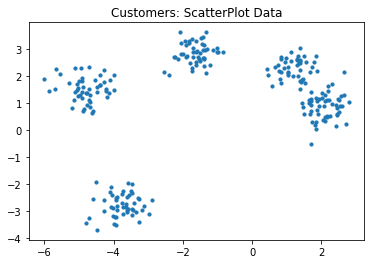

In [2]:
customers = np.loadtxt('customers.txt')
plt.scatter(customers[:,0], customers[:,1], s=10)

plt.title('Customers: ScatterPlot Data')

## Step 3: Determine the number of optimal clusters 

Use your human intuition based on the scatter plot above to decide how many clusters of customers you want to identify. This is the only step which relies on human brainpower (in practice, this can be automated as well, but that is beyond the scope of the assignment). Set variable `k` to the number of desired clusters.

In [3]:
k=5

## Step 4: Initialize the cluster centers 
The algorithm will keep track (and update) the centers of each cluster and will assign each customer to exactly one cluster based on the distances of the customer and centers. For the initial locations of the cluster centers pick `k` number of random of customer locations and store this array in a new variable, called `centroids`. Verify, that the shape os this array is `(k, 2)`.

In [4]:
centroids = customers[np.random.randint(0, customers.shape[0], size=k), :]

verify_shape = centroids.shape 
verify_shape

(5, 2)

## Step 5: Initialize the cluster assignment 

Compute a new 1-dimensional integer array of `n` elements, called `assigment`, which describes the customer to cluster assignment. The assignment is decided on the geographical distances. For each customer store the integer index of the cluster, whose current location center (see `centroids`) is the closest to the customer. Do not use explicit for loops.

Hint: first, compute all the pairwise distances between the customers and all cluster centers using a 3D array and automatic broadcasting. Try to understand the shape and meaning of the following expression: `customers - centroids[:, np.newaxis, :]`. Use this expression with squaring and the NumPy `sum` function (on the proper axis) to compute the pairwise distances. Finally, use `argmin` (on the proper axis) to find the indexes of the closest cluster centers.

In [5]:
def cluster_assign(customers, centroids):
    return np.argmin(np.sum((customers - centroids[:,np.newaxis,:])**2,axis=2),axis=0)

assignment = cluster_assign(customers, centroids)


## Step 5v: Verify the cluster assignment

Execute the code below to verify that the `customers`, `centroids` and `assignment` arrays are properly initialized. You should see the `k` cluster centers in red and the assignments in different colors. Note: this is (obviously) not the final/optimal clustering, yet.

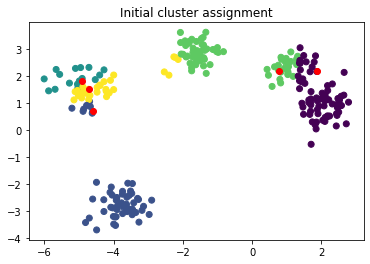

In [6]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster assignment");

## Step 6: Update the cluster centers 
Compute the updated location of the cluster centers. Based on the cluster assignment, compute the mean location of the customers in each cluster. This is going to be the new/updated location of the cluster center (`centroids`).

Hint: This time you may use a (short) loop on the number of clusters. Try to use boolean indexing (masking) with the assignment to select all the customers belonging to the current cluster. You can also use the NumPy `mean()` function (with the proper axis) to compute the mean location of the cluster. 

In [7]:
def updated_location(customers, assignment, k):
    update = np.zeros((k, customers.shape[1]))
    for i in range(k):
        update[i] = np.mean(customers[assignment==i], axis=0)
    return update

centroids = updated_location(customers, assignment, k)

## Step 6v: Verify the updated cluster centers

Execute the code below to verify that `centroids` is properly updated. While this is still not the final clustering, each center should be at the center of its assigned customers.

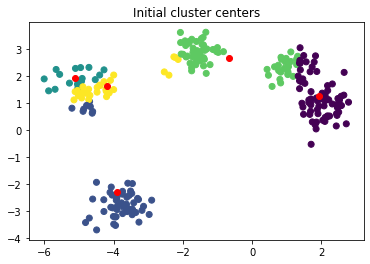

In [8]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster centers");

## Step 7: Iterative optimization

Based on steps 5 & 6 (you can use copy & paste), implement a loop which iteratively updates the cluster assignment and the cluster centers as long as there is some change in the cluster assignment.

In [9]:
while True:
    assignment = cluster_assign(customers, centroids)
    update_c = updated_location(customers, assignment, k)
    if np.all(centroids == update_c):
        break
    centroids = update_c

## Step 7v: Verify the final clusters

Execute the code below to see the final clusters. Note: while the results should look reasonable, it is not guaranteed that the algorithm finds the most optimal clusters and centers (becuase of the initial random picks of the centers). Try to run the notebook multiple times (you may want to use  `np.random.seed()` with different parameters at the start) to see if you can get the desired/optimal result.

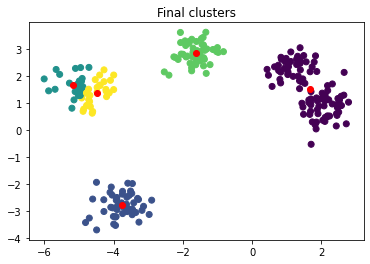

In [10]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Final clusters");